In [1]:
a = "(-211, -154) (134, -154)@(+163, 2) (-79, 119)@"
import re
#/[-+]?[0-9]+/
t = re.findall(r'\-?\+?\d+', a)
print(t)

['-211', '-154', '134', '-154', '+163', '2', '-79', '119']


In [2]:
import re
s = "tim email is tim@somehost.com"
match = re.search(r'[\w.-]+@[\w.-]+', s)
print(match)

<re.Match object; span=(13, 29), match='tim@somehost.com'>


In [3]:
import datetime
x = datetime.datetime(2020, 5, 17)
v = datetime.datetime.strptime("2020-05-17 00:00:00", '%Y-%m-%d %H:%M:%S')
print(v)

2020-05-17 00:00:00


In [4]:
from itertools import accumulate
from functools import reduce

lis = [1,2,3,4,5,6]
print(*accumulate(lis))
print(reduce(lambda a, b: a+b, lis))

1 3 6 10 15 21
21


In [5]:
from itertools import combinations, permutations
arr = [1,2,3]
c = combinations(arr, 2)
p = permutations(arr)
for i in c: print(i)
print()
for i in p: print(i)

(1, 2)
(1, 3)
(2, 3)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [6]:
def merge(a, b):
    return [max(a, b).pop(0) for _ in a+b]
            
a = [1,3,5,7]
b = [2,4,0,8]
print(merge(a, b))

[2, 4, 1, 3, 5, 7, 0, 8]


In [7]:
max([6, 7], [6,0,4])

[6, 7]

In [23]:
# random usages
import random

rint = random.randint(0, 1) # its inclusive at both ends
print(rint)

rrange = random.randrange(0, 6, 2) # picks randomly from the range generated value
print(rrange)

rchoice = random.choice([1,2,3,4,5]) # picks randomly from input list
print(rchoice)

0
2
5


In [8]:
from treeVisuals import *

root = randomTree(10, 0.5, 10000)

def prettyPrintTree(node, prefix="", isLeft=True):
    if not node:
        print("Empty Tree")
        return

    if node.right:
        prettyPrintTree(node.right, prefix + ("│   " if isLeft else "    "), False)

    print(prefix + ("└── " if isLeft else "┌── ") + str(node.val))

    if node.left:
        prettyPrintTree(node.left, prefix + ("    " if isLeft else "│   "), True)
        
# prettyPrintTree(root)

In [9]:
s = """
String
Dynamic Programming
Sorting
Greedy
Binary Search
Matrix
Two Pointer
Bit Manupilation
Stack
Heap
Graph
Back Tracking
Prefix Sum
Sliding Window
Linked List
DSU
Binary Tree
Trie
Divide and Conquer
Bit Mask
Game Theory
Segment Tree
Topological Sorting
String matching
Line Sweep
Math
Hash Table
"""
a = sorted(s.split("\n"))
for i in a:
    if len(i): print(i)

Back Tracking
Binary Search
Binary Tree
Bit Manupilation
Bit Mask
DSU
Divide and Conquer
Dynamic Programming
Game Theory
Graph
Greedy
Hash Table
Heap
Line Sweep
Linked List
Math
Matrix
Prefix Sum
Segment Tree
Sliding Window
Sorting
Stack
String
String matching
Topological Sorting
Trie
Two Pointer


In [4]:
print(*[[1,2,1],[2,3,2],[1,3,2]])


[1, 2, 1] [2, 3, 2] [1, 3, 2]


In [5]:
'-'.isdigit()

False

In [ ]:
["This    is    an","example  of text","justification.  "]

In [1]:
1<<20

1048576

In [3]:
d = {chr(a): i for i, a in enumerate(range(ord('a'), ord('z')+1), 1)}
print(d)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


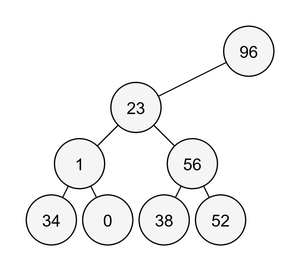

In [19]:
from treeVisuals import *

jdraw(randomTree())

In [60]:
n = 4
graph = [[1, 2], [0, 3], [0, 3], [1, 2]]

v = [0]*n
inn = [0]*n
out = [0]*n
ans = []

def dfs(node, time):
    time += 1
    inn[node] = time
    v[node] = 1
    ans.append(node)
    for nbr in graph[node]:
        if not v[nbr]:
            time = dfs(nbr, time)
    time += 1
    out[node] = time
    return time
            
dfs(0, 0)
print(ans)
print(inn)
print(out)

[0, 1, 3, 2]
[1, 2, 4, 3]
[8, 7, 5, 6]


In [86]:
def dfsR(node):
    ans = []
    stack = [[node, 0]]
    time = 0
    v = [0]*n
    
    print(stack)
    while stack:
        node, location = stack.pop()
        if location == 0:
            if v[node] == 0:
                v[node] = 1
                time += 1
                inn[node] = time
                ans.append(node)

                stack.append([node, 1])
                for nbr in graph[node][::-1]:
                    if v[nbr] == 0:
                        stack.append([nbr, 0])
        else:
            time += 1
            out[node] = time
        
        print(stack)
    
    print(ans)
    print(inn)
    print(out)

dfsR(0)

[[0, 0]]
[[0, 1], [2, 0], [1, 0]]
[[0, 1], [2, 0], [1, 1], [3, 0]]
[[0, 1], [2, 0], [1, 1], [3, 1], [2, 0]]
[[0, 1], [2, 0], [1, 1], [3, 1], [2, 1]]
[[0, 1], [2, 0], [1, 1], [3, 1]]
[[0, 1], [2, 0], [1, 1]]
[[0, 1], [2, 0]]
[[0, 1]]
[]
[0, 1, 3, 2]
[1, 2, 4, 3]
[8, 7, 5, 6]


In [82]:
G = graph
V = [1,1,1,1]
T = [0]

while T:
    s=T.pop()
    V[s]-=1
    if V[s]:
        print(s)
    else:
        print("OK", s)
        T+=s,
        for e in G[s][::-1]:
            if V[e]:T+=e,


OK 0
OK 1
OK 3
OK 2
2
3
1
2
0
